# S3 Download

In [4]:
PATH_LOCAL_DATA = '../data/'
PATH_LOCAL_EXPERIMENTS = '../experiment/'

PATH_S3_DATA = 's3://mobility-research/project-dpgan-1/data'
PATH_S3_EXPERIMENTS = 's3://mobility-research/project-dpgan-1/experiment'

In [2]:
import sys
sys.path.append('..')

In [3]:
from programs.config import PATH_LOCAL_DATA, PATH_LOCAL_EXPERIMENTS, PATH_S3_DATA, PATH_S3_EXPERIMENTS
from programs.settings import session

In [12]:
import os
import awswrangler as wr
import pandas as pd

In [10]:
session.get_credentials()

In [ ]:
def get_geolife():
    


In [11]:
file = 'geolife_consolidated.parquet'

In [15]:
path_file_s3 = os.path.join(PATH_S3_DATA, file)

In [ ]:
wr.s3.read_parquet(path_file_s3)

In [16]:
for file in [#'geolife_consolidated.parquet', 
             'geolife_sample.parquet']:
    path_file_s3 = os.path.join(PATH_S3_DATA, file)
    data = wr.s3.read_parquet(path_file_s3)

In [ ]:
wr.s3.read_parquet()

In [17]:
data.shape

(1844244, 7)

In [18]:
data

,user,hour,lat,lng,seconds_diff,distance_to_last_km,speed_mps
0,0,2008-10-23 02:53:04,39.984702,116.318417,NaN,NaN,NaN
1,0,2008-10-23 02:53:10,39.984683,116.318450,6.0,0.003517,0.586148
2,0,2008-10-23 02:53:15,39.984686,116.318417,5.0,0.002831,0.566260
3,0,2008-10-23 02:53:20,39.984688,116.318385,5.0,0.002735,0.547087
4,0,2008-10-23 02:53:25,39.984655,116.318263,5.0,0.011023,2.204602
...,...,...,...,...,...,...,...
1844239,9,2008-12-14 11:17:49,40.002858,116.343537,248.0,0.028621,0.115406
1844240,9,2008-12-14 11:17:54,40.002832,116.343495,5.0,0.004600,0.919918
1844241,9,2008-12-14 11:17:59,40.002821,116.343437,5.0,0.005089,1.017883
1844242,9,2008-12-14 11:18:04,40.002790,116.343383,5.0,0.005748,1.149572


In [19]:
PATH_S3_DATA

's3://mobility-research/project-dpgan-1/data'

In [22]:
df = pd.DataFrame({'val1':[2,1,3,1], 'val2':[5,3,2,33]})
df

,val1,val2
0,2,5
1,1,3
2,3,2
3,1,33


In [24]:
df.to_csv('file.csv', index=False)

In [25]:
import boto3

In [38]:
s3.Bucket(bucket_name).upload_file(filename, key_s3)

In [84]:
def upload_file_to_s3(filename='geolife_consolidated.parquet',
                      local_path=PATH_LOCAL_DATA, 
                      s3_path=PATH_S3_DATA,
                      print_progress=False):
    s3 = boto3.resource('s3')
    path_file_s3 = os.path.join(s3_path, filename)
    path_file_local = os.path.join(local_path, filename)
    
    bucket_s3, key_s3 = path_file_s3[5:].split('/', 1) # split into bucket and key
    
    s3.Bucket(bucket_name).upload_file(path_file_local, key_s3)
    if print_progress:
        print(f'INFO: File uploaded to {path_file_s3}')

In [81]:
def download_file_from_s3(filename='geolife_consolidated.parquet',
                          local_path=PATH_LOCAL_DATA, 
                          s3_path=PATH_S3_DATA,
                          print_progress=False):
    s3 = boto3.resource('s3')
    path_file_s3 = os.path.join(s3_path, filename)
    path_file_local = os.path.join(local_path, filename)
        
    bucket_s3, key_s3 = path_file_s3[5:].split('/', 1) # split into bucket and key

    s3.Bucket(bucket_name).download_file(key_s3, path_file_local)
    if print_progress:
        print(f'INFO: File download from {path_file_s3}')

In [83]:
download_file_from_s3(filename='file.csv', local_path='.', s3_path=PATH_S3_DATA, print_progress=True)

INFO: File download from s3://mobility-research/project-dpgan-1/data/file.csv


In [ ]:
upload_file_to_s3(filename='file.csv', local_path='.', s3_path=PATH_S3_DATA, print_progress=True)

INFO: File uploaded to s3://mobility-research/project-dpgan-1/data/file.csv


In [69]:
filename

'file.csv'

In [61]:
s3.Bucket(bucket_name).download_file(key_s3, filename)

In [60]:
s3b = s3.Bucket(bucket_name)

In [ ]:
s3b.download_file()

In [57]:
upload_file_to_s3(filename='file.csv', local_path='.', s3_path=PATH_S3_DATA, print_progress=True)

INFO: File loaded to s3://mobility-research/project-dpgan-1/data/file.csv


In [50]:
PATH_S3_DATA.split('//')[1].split('/', 1)

['mobility-research', 'project-dpgan-1/data']

In [55]:
PATH_S3_DATA[5:].split('/', 1)

['mobility-research', 'project-dpgan-1/data']

In [28]:
PATH_S3_DATA

's3://mobility-research/project-dpgan-1/data'

In [35]:
key_s3

'project-dpgan-1/data'

# Visualize data

In [1]:
import pandas as pd

In [46]:
data = pd.read_csv('../data/users/data_user_046.csv')

In [11]:
data

,time,lat,lon,user
0,2009-10-04 01:51:25,39.175415,117.150240,46
1,2009-10-04 01:51:30,39.175229,117.150620,46
2,2009-10-04 01:51:35,39.175153,117.150866,46
3,2009-10-04 01:51:40,39.175149,117.150966,46
4,2009-10-04 01:51:45,39.175126,117.150976,46
...,...,...,...,...
21813,2010-06-02 11:25:34,40.032620,116.328113,46
21814,2010-06-02 11:25:39,40.032616,116.328072,46
21815,2010-06-02 11:25:44,40.032615,116.328060,46
21816,2010-06-02 11:25:49,40.032616,116.328053,46


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
user = 46

In [34]:
import warnings

In [35]:
warnings.filterwarnings('ignore')

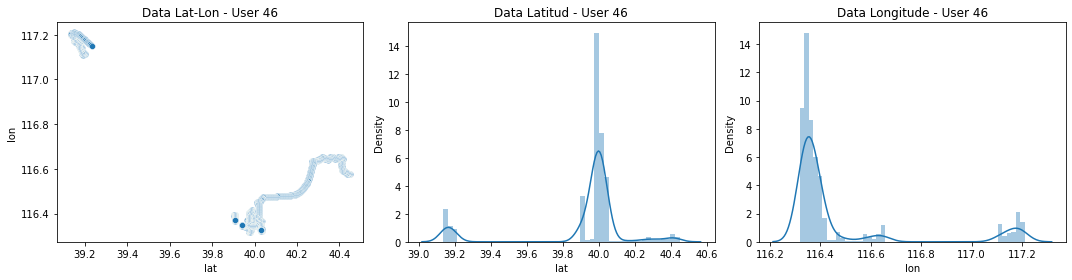

In [56]:
fig = plt.figure(figsize=(15, 4))

fig.add_subplot(1, 3, 1)
sns.scatterplot(data['lat'],data['lon'])
plt.title(f'Data Lat-Lon - User {user}')

fig.add_subplot(1, 3, 2)
sns.distplot(data['lat'])
plt.title(f'Data Latitud - User {user}')

fig.add_subplot(1, 3, 3)
sns.distplot(data['lon'])
plt.title(f'Data Longitude - User {user}')

plt.tight_layout();

fig.savefig('img.png')

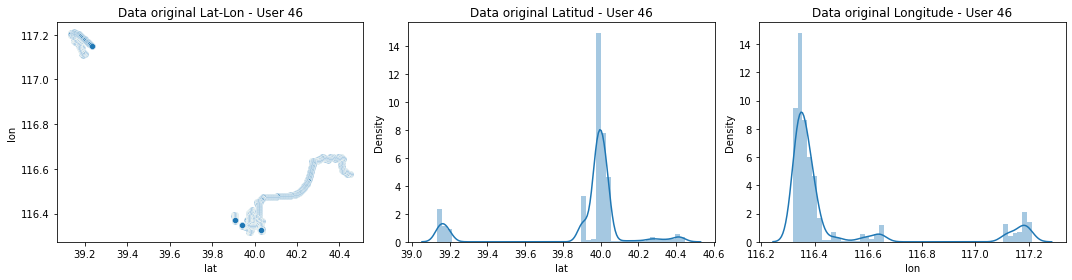

In [49]:
plot_user_geodata(data2, user)

In [63]:
import os

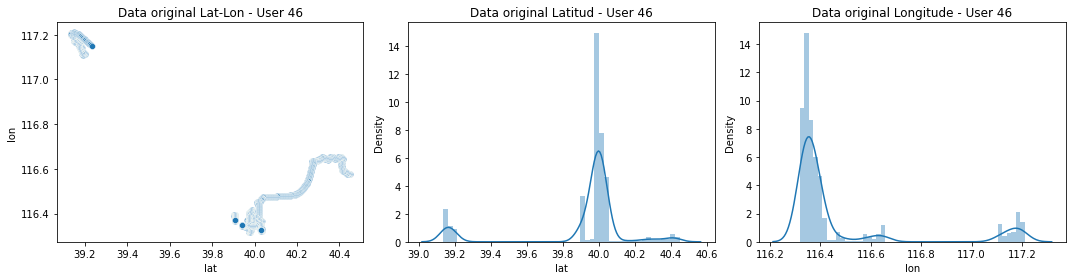

In [64]:
plot_user_geodata(data, user, img_path='../')

In [61]:
def plot_user_geodata(data, user, title='original', figsize=(15, 4), img_path='./'):
    fig = plt.figure(figsize=figsize)

    fig.add_subplot(1, 3, 1)
    sns.scatterplot(data['lat'],data['lon'])
    plt.title(f'Data {title} Lat-Lon - User {user}')

    fig.add_subplot(1, 3, 2)
    sns.distplot(data['lat'])
    plt.title(f'Data {title} Latitud - User {user}')

    fig.add_subplot(1, 3, 3)
    sns.distplot(data['lon'])
    plt.title(f'Data {title} Longitude - User {user}')

    plt.tight_layout();

    fig.savefig(os.path.join(img_path, f'{title}_{user}.png'))

In [23]:
data2 = data.append(data).append(data).append(data).append(data).append(data)

# Resizing data

In [12]:
import pandas as pd
import sys
import warnings

In [11]:
warnings.filterwarnings('ignore')

In [7]:
PATH_HOME = '..'
sys.path.append(PATH_HOME)

In [8]:
from programs.gan_utils.gan_utils import plot_user_geodata

In [79]:
user = pd.read_csv('../data/users/data_user_005.csv')

In [80]:
user.shape

(109046, 4)

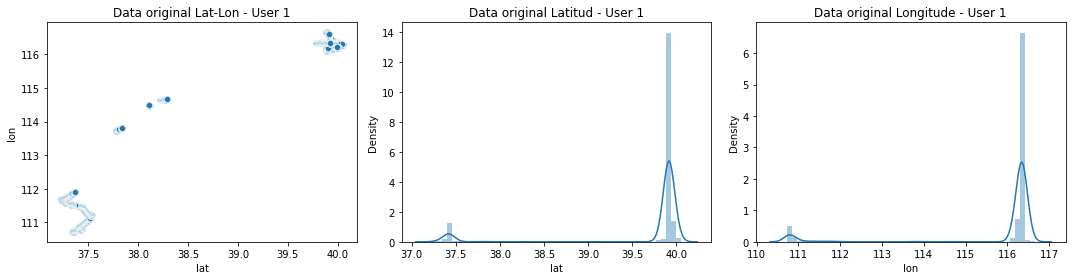

In [66]:
plot_user_geodata(user, 1)

In [67]:
user['day_name'] = pd.to_datetime(user['time']).dt.day_name()

In [68]:
user['day_name'].value_counts()

Saturday     57102
Sunday       44224
Thursday     33656
Friday       30891
Tuesday      28301
Wednesday    28199
Monday       25841
Name: day_name, dtype: int64

In [75]:
def clean_data_geopoints(data, clean_weekends=False, clean_outliers=False, ndesv=2):
    if clean_weekends:
        data['day_name'] = pd.to_datetime(data['time']).dt.day_name()
        data = data[~(data['day_name'].isin(['Saturday','Sunday']))]
        del data['day_name']
        
    if clean_outliers:
        # Determine limits
        bounds_lat = [user['lat'].mean() + x * user['lat'].std() for x in [-ndesv, ndesv]]
        bounds_lon = [user['lon'].mean() + x * user['lon'].std() for x in [-ndesv, ndesv]]
        
        data = data[((data['lat']>=bounds_lat[0]) & (data['lat']<=bounds_lat[1]))
                      & ((data['lon']>=bounds_lon[0]) & (data['lon']<=bounds_lon[1]))]
    return data

In [81]:
user = clean_data_geopoints(user, clean_weekends=True, clean_outliers=True)

In [82]:
user.shape

(77824, 4)

In [71]:
user['day_name'].value_counts()

Friday       29021
Thursday     28898
Tuesday      24691
Monday       24603
Wednesday    22961
Name: day_name, dtype: int64

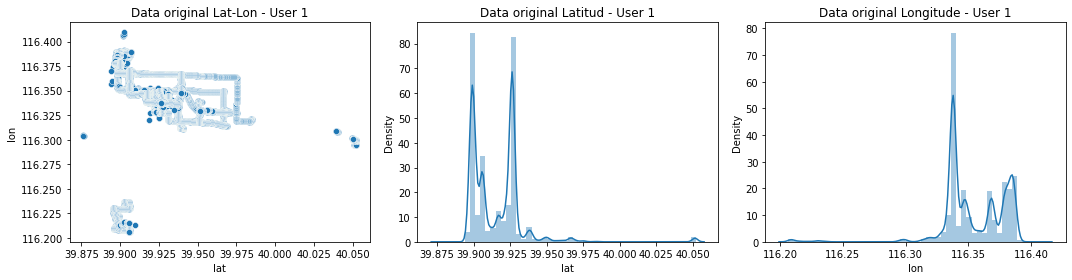

In [78]:
plot_user_geodata(user, 1)

In [59]:
ndesv = 2
bounds_lat = [user['lat'].mean() + x * user['lat'].std() for x in [-ndesv, ndesv]]
bounds_lon = [user['lon'].mean() + x * user['lon'].std() for x in [-ndesv, ndesv]]

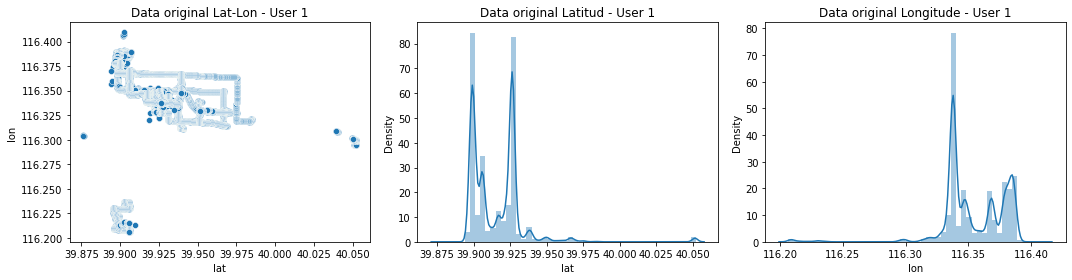

In [56]:
plot_user_geodata(user[(~user['day_name'].isin(['Saturday','Sunday']))
                      & ((user['lat']>=bounds_lat[0]) & (user['lat']<=bounds_lat[1]))
                      & ((user['lon']>=bounds_lon[0]) & (user['lon']<=bounds_lon[1]))
                      ], 1)

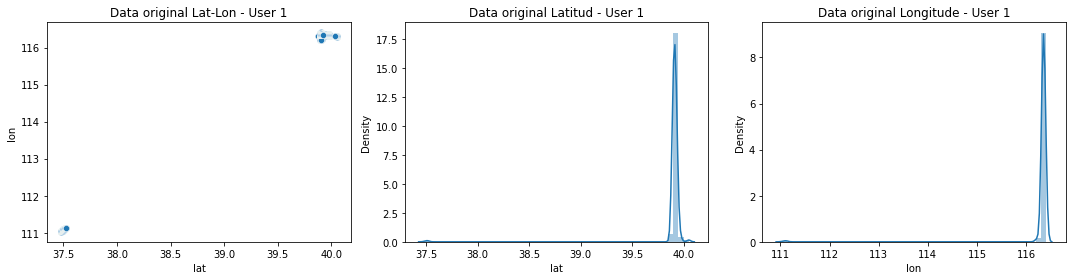

In [58]:
plot_user_geodata(user[(~user['day_name'].isin(['Saturday','Sunday']))
                      & ((user['lat']>=bounds_lat[0]) & (user['lat']<=bounds_lat[1]))
                      & ((user['lon']>=bounds_lon[0]) & (user['lon']<=bounds_lon[1]))
                      ], 1)

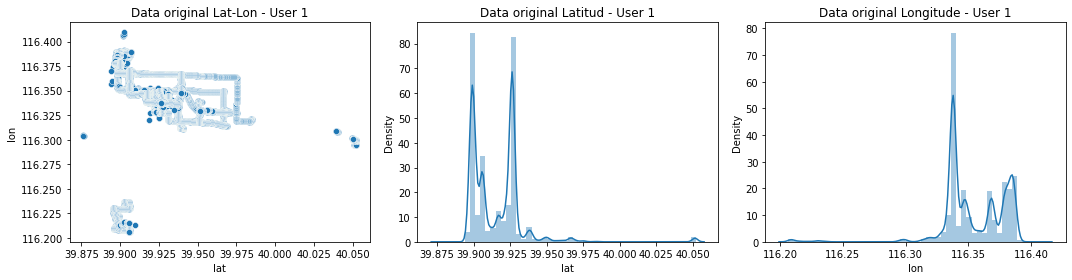

In [60]:
plot_user_geodata(user[(~user['day_name'].isin(['Saturday','Sunday']))
                      & ((user['lat']>=bounds_lat[0]) & (user['lat']<=bounds_lat[1]))
                      & ((user['lon']>=bounds_lon[0]) & (user['lon']<=bounds_lon[1]))
                      ], 1)

In [28]:
user['lat'].max()

40.076116

In [5]:
user

,time,lat,lon,user
0,2008-10-23 05:53:05,39.984094,116.319236,1
1,2008-10-23 05:53:06,39.984198,116.319322,1
2,2008-10-23 05:53:11,39.984224,116.319402,1
3,2008-10-23 05:53:16,39.984211,116.319389,1
4,2008-10-23 05:53:21,39.984217,116.319422,1
...,...,...,...,...
108602,2008-12-15 00:30:58,39.977969,116.326651,1
108603,2008-12-15 00:31:03,39.977946,116.326653,1
108604,2008-12-15 00:31:08,39.977897,116.326624,1
108605,2008-12-15 00:31:13,39.977882,116.326626,1


# GAN Generation

In [5]:
import sys
sys.path.append('../')

import os
import time
from matplotlib.pyplot import title
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from programs.config import PATH_LOCAL_DATA
import warnings 

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
print(tf.__version__)
print(gpus)

from programs.gan_utils.dpgan_tf2 import DPGAN
from programs.gan_utils.gan_tf2 import GAN
from programs.gan_utils.gan_utils import (get_optimizers, 
                                get_scaled_data, 
                                get_generated_data, 
                                get_data_user_conjoined, 
                                plot_user_geodata)
warnings.filterwarnings('ignore')

2.7.0
[]


In [119]:
path_data:str = os.path.join('..',PATH_LOCAL_DATA, 'users')
path_output:str = os.path.join('..',PATH_LOCAL_DATA, 'users_gan')
path_models_out:str = os.path.join('..',PATH_LOCAL_DATA, 'models_gan')
path_img:str = os.path.join('..',PATH_LOCAL_DATA, 'img')
filename:str = 'data_user_100.csv'
nepochs:int = 200
param:dict = {'batch_size': 64,
            'discriminatorDims': [64, 32, 16, 1],
            'generatorDims': [512, 3],
            'input_dim': 3,
            'optimizer': 'Adam',
            'random_dim': 100
            }

In [120]:
from tqdm import tqdm

In [315]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tqdm import tqdm
import time 

class GAN:

    def __init__(
        self,
        input_dim,
        random_dim,
        discriminatorDims,
        generatorDims,
        g_optimizer,
        d_optimizer
    ):

        self.input_dim = input_dim
        self.random_dim = random_dim
        self.discriminatorDims = discriminatorDims
        self.generatorDims = generatorDims

        self.g_net = self.create_generator()
        self.d_net = self.create_discriminator()

        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer

        self.g_loss_store = []
        self.d_loss_store = []
        self.wdis_store   = []

    def create_generator(self):
        G = tf.keras.Sequential()
        G.add(tf.keras.Input(shape=(self.random_dim,)))
        for u in self.generatorDims[:-1]:
            G.add(tf.keras.layers.Dense(units=u))
            G.add(tf.keras.layers.BatchNormalization())
            G.add(tf.keras.layers.LeakyReLU(alpha=0.2))
        G.add(tf.keras.layers.Dense(self.generatorDims[-1], activation="relu"))

        return G

    def create_discriminator(self):
        D = tf.keras.Sequential()
        D.add(tf.keras.Input(shape=(self.input_dim,)))
        for u in self.discriminatorDims[:-1]:
            D.add(tf.keras.layers.Dense(units=u))
            D.add(tf.keras.layers.LeakyReLU(alpha=0.2))
        D.add(tf.keras.layers.Dense(self.discriminatorDims[-1], activation="relu"))

        return D

    def random_noise(self, nrows=None):
        return tf.random.uniform(
            (self.batch_size if not nrows else nrows, self.random_dim),
            minval=-1, maxval=1
        )

    def dpnoise(self, tensor):
        '''add noise to tensor'''
        s = tensor.get_shape().as_list()  # get shape of the tensor

        rt = tf.random.normal(s, mean=0.0, stddev=self.noise_std)
        t = tf.add(tensor, tf.scalar_mul((1.0 / self.batch_size), rt))
        return t

    @tf.function
    def g_train_step(self, x_real):

        with tf.GradientTape() as gen_tape:
            z = self.random_noise()

            x_fake = self.g_net(z, training=True)

            y_hat_fake = self.d_net(x_fake, training=False)

            g_loss = tf.reduce_mean(y_hat_fake)

        g_grads = gen_tape.gradient(g_loss, self.g_net.trainable_variables)

        self.g_optimizer.apply_gradients(zip(g_grads, self.g_net.trainable_variables))

        return g_loss

    @tf.function
    def d_train_step(self, x_real):

        with tf.GradientTape() as disc_tape:
            z = self.random_noise()

            x_fake = self.g_net(z, training=False)

            y_hat_real = self.d_net(x_real, training=True)
            y_hat_fake = self.d_net(x_fake, training=True)

            d_loss = tf.reduce_mean(y_hat_fake) - tf.reduce_mean(y_hat_real) 

        d_grads = disc_tape.gradient(d_loss, self.d_net.trainable_variables)

        self.d_optimizer.apply_gradients(zip(d_grads, self.d_net.trainable_variables))

        self.d_clip = [v.assign(tf.clip_by_value(v, -0.01, 0.01)) for v in self.d_net.trainable_variables]

        return d_loss

    def train(self, dataset, nepochs, batch_size, output_examples):
        self.batch_size = batch_size
        self.output_examples = output_examples
        with tf.device("gpu:0"):
            for epoch in tqdm(range(nepochs)):
                start_time = time.time()
                pbar = tqdm(dataset, disable=True)
                pbar.set_description("Epoch {}/{}".format(epoch+1, nepochs))
                for batch in pbar:
                    batch = tf.cast(batch, tf.float32)
                    rd_loss = self.d_train_step(batch)
                    rg_loss = self.g_train_step(batch)
                    
                    self.g_loss_store.append(rg_loss.numpy())
                    self.d_loss_store.append(rd_loss.numpy())

        z_sample = self.random_noise(self.output_examples)
        x_gene = self.g_net.predict(z_sample)
        return x_gene

    def generate_data(self, num_samples):
        z_sample = self.random_noise(num_samples)
        x_gene = self.g_net.predict(z_sample)
        return x_gene
    
    
    def save_models(self, path='./'):
        path_models = os.path.join(path, 'models')
        if not os.path.exists(path_models):
            os.mkdir(path_models)
        self.d_net.save(os.path.join(path_models, 'dnet.h5'))
        self.g_net.save(os.path.join(path_models, 'gnet.h5'))
        
        try:
            d_loss = [float(x) for x in self.d_loss_store]
            g_loss = [float(x) for x in self.g_loss_store]
            json.dump(d_loss, open(os.path.join(path_models, 'd_loss.json'), 'w'))
            json.dump(g_loss, open(os.path.join(path_models, 'g_loss.json'), 'w'))
        except:
            print('Losses could not be saved')
            pass
        
        print(f'Models saved in {path_models}!')
        
    def load_models(self, path='./'):
        path_models = os.path.join(path, 'models')
        if os.path.exists(path_models):
            self.d_net = tf.keras.models.load_model(os.path.join(path_models, 'dnet.h5'))
            self.g_net = tf.keras.models.load_model(os.path.join(path_models, 'gnet.h5'))
            
            try:
                self.d_loss_store = json.load(open(os.path.join(path_models, 'd_loss.json'), 'r'))
                self.g_loss_store = json.load(open(os.path.join(path_models, 'g_loss.json'), 'r'))            
            except:
                print('Losses could not be loaded')
                pass                
            print(f'Models loaded from {path_models}!')
        else:
            print(f'Path "{path_models}" not found.')
            
    
    def plot_loss_progress(self, path='./'):
        fig = plt.figure(figsize=(12,4))

        fig.add_subplot(1, 2, 1)
        plt.plot(self.g_loss_store)
        plt.title('Generator Losses')
        plt.xlabel('step')

        fig.add_subplot(1, 2, 2)
        plt.plot(self.d_loss_store)
        plt.title('Discriminator Losses')
        plt.xlabel('step')

        plt.tight_layout();
        plt.savefig(os.path.join(path, 'losses.jpg'))

In [146]:
file_path = os.path.join(path_data, filename)

data = pd.read_csv(file_path)

100%|████████████████████████████████████████████████████████████████████████| 200/200 [00:37<00:00,  5.36it/s]


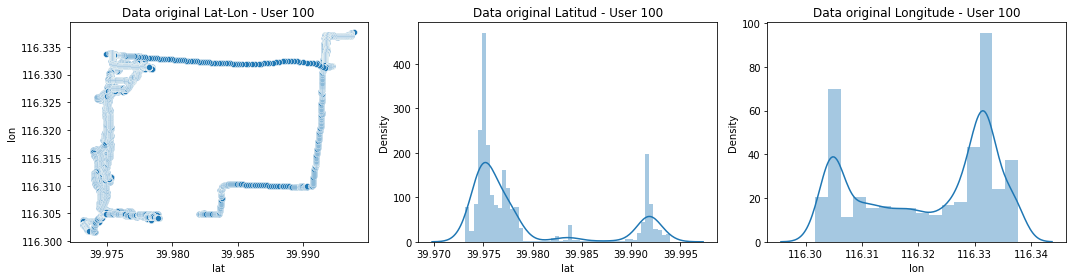

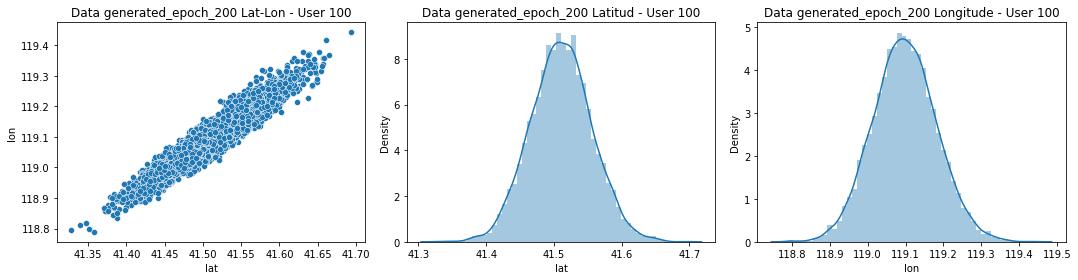

In [245]:
start_time = time.time()
g_optimizer, d_optimizer = get_optimizers(param["optimizer"])
dp = GAN(
        param["input_dim"],
        param["random_dim"],
        param["discriminatorDims"],
        param["generatorDims"],
        g_optimizer,
        d_optimizer
    )

data_conjoint, user_conjoint = get_data_user_conjoined(data)
plot_user_geodata(data, user=user_conjoint, title='original', img_path=path_img)

data_scaled, scaler = get_scaled_data(data_conjoint)
dataset = tf.data.Dataset.from_tensor_slices(data_scaled).shuffle(50000).batch(param["batch_size"], drop_remainder=True)

results = dp.train(dataset, nepochs, param["batch_size"], data.shape[0])
gen_data = get_generated_data(results, scaler, user=user_conjoint)

plot_user_geodata(gen_data, user=user_conjoint, title=f'generated_epoch_{nepochs}', img_path=path_img)


execution_time = time.time() - start_time

d_dims = '_'.join([str(x) for x in param["discriminatorDims"]])
g_dims = '_'.join([str(x) for x in param["generatorDims"]])
lat_metrics = ks_2samp(data_conjoint['lat'], gen_data['lat'])
lon_metrics = ks_2samp(data_conjoint['lon'], gen_data['lon'])
time_metrics = ks_2samp(pd.to_datetime(data_conjoint['time']).astype(int)/10**9, 
                       pd.to_datetime(gen_data['time']).astype(int)/10**9)
exp_dir = f'user_{user_conjoint}_ddims_{d_dims}_gdims_{d_dims}_epochs_{nepochs}'

registry_info = {
    'user_conjoint': user_conjoint,
    'exp_dir': exp_dir,
    'g_dims': g_dims,
    'd_dims': d_dims,
    'nepochs': nepochs,
    'ks_lat': lat_metrics[0],
    'ks_lon': lon_metrics[0],
    'ks_time': time_metrics[0],
    'ks_pv_lat': lat_metrics[1],
    'ks_pv_lon': lon_metrics[1],
    'ks_pv_time': time_metrics[1],
    'execution_time': execution_time
}

<AxesSubplot:>

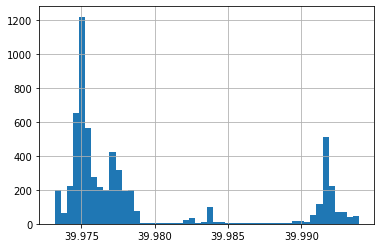

In [164]:
data_conjoint['lat'].hist(bins=50)

In [166]:
from scipy.stats import ks_2samp

In [254]:
exp_dir = f'user_{user_conjoint}_ddims_{d_dims}_gdims_{d_dims}_epochs_{nepochs}'

In [256]:
d_dims = '_'.join([str(x) for x in param["discriminatorDims"]])
g_dims = '_'.join([str(x) for x in param["generatorDims"]])

lat_metrics = ks_2samp(data_conjoint['lat'], gen_data['lat'])
lon_metrics = ks_2samp(data_conjoint['lon'], gen_data['lon'])
time_metrics = ks_2samp(pd.to_datetime(data_conjoint['time']).astype(int)/10**9, 
                       pd.to_datetime(gen_data['time']).astype(int)/10**9)

exp_dir = f'user_{user_conjoint}_ddims_{d_dims}_gdims_{d_dims}_epochs_{nepochs}'

registry_info = {
    'user_conjoint': user_conjoint,
    'exp_dir': exp_dir,
    'g_dims': g_dims,
    'd_dims': d_dims,
    'nepochs': nepochs,
    'ks_lat': lat_metrics[0],
    'ks_lon': lon_metrics[0],
    'ks_time': time_metrics[0],
    'ks_pv_lat': lat_metrics[1],
    'ks_pv_lon': lon_metrics[1],
    'ks_pv_time': time_metrics[1],
    'execution_time': execution_time
}

In [261]:
dp.batch_size


64

In [263]:
len(dp.d_loss_store) / dp.batch_size

303.125

In [278]:
import json

In [288]:
type(x[0])

numpy.float64

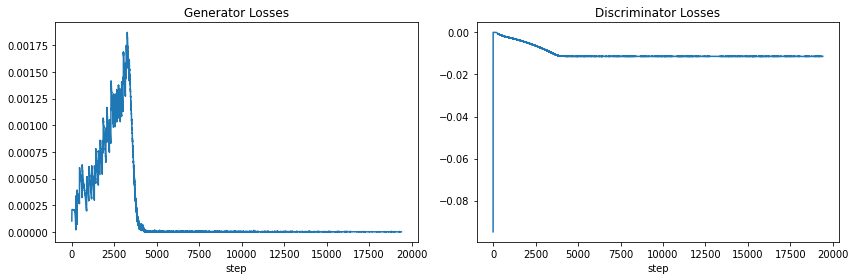

In [313]:
fig = plt.figure(figsize=(12,4))

fig.add_subplot(1, 2, 1)
plt.plot(dp.g_loss_store)
plt.title('Generator Losses')
plt.xlabel('step')

fig.add_subplot(1, 2, 2)
plt.plot(dp.d_loss_store)
plt.title('Discriminator Losses')
plt.xlabel('step')

plt.tight_layout();
plt.savefig(os.path.join(path, 'losses.jpg'))

In [311]:
path='./'

In [312]:
os.path.join(path, 'losses.jpg')

'./losses.jpg'

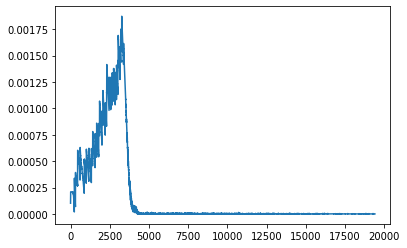

In [260]:
plt.plot(dp.g_loss_store)

In [257]:
pd.DataFrame([registry_info])

,user_conjoint,exp_dir,g_dims,d_dims,nepochs,ks_lat,ks_lon,ks_time,ks_pv_lat,ks_pv_lon,ks_pv_time,execution_time
0,100,user_100_ddims_64_32_16_1_gdims_64_32_16_1_epo...,512_3,64_32_16_1,200,1.0,1.0,0.573278,0.0,0.0,0.0,38.225052


In [224]:
time_metrics[1]

0.0

In [40]:
import joblib
import matplotlib.pyplot as plt

In [152]:
dp2 = GAN(
        param["input_dim"],
        param["random_dim"],
        param["discriminatorDims"],
        param["generatorDims"],
        g_optimizer,
        d_optimizer
    )


In [154]:
dp.save_models(path=)

In [155]:
dp2.load_models()

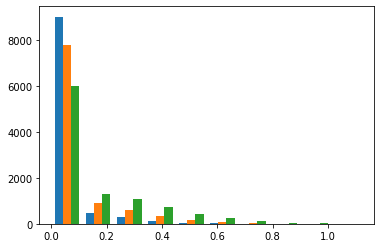

In [149]:
plt.hist(dp2.generate_data(10000));

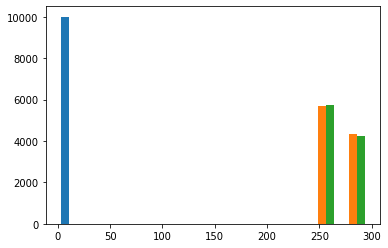

In [138]:
plt.hist(dp.generate_data(10000));

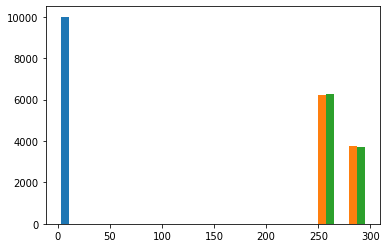

In [136]:
plt.hist(dp2.generate_data(10000));

In [126]:
dp.d_net.save('d_net.h5')
dp.g_net.save('g_net.h5')

In [127]:
dp.g_net.save('g_net.h5')

In [131]:
d_net2 = tf.keras.models.load_model('d_net.h5')
g_net2 = tf.keras.models.load_model('g_net.h5')

In [133]:
dp2.d_net = d_net2
dp2.g_net = g_net2

(array([10043., 10075.,  9999.,  9820., 10121.,  9877., 10078.,  9925.,
        10041., 10021.]),
 array([-9.99949455e-01, -7.99956739e-01, -5.99964023e-01, -3.99971277e-01,
        -1.99978545e-01,  1.41859055e-05,  2.00006917e-01,  3.99999648e-01,
         5.99992394e-01,  7.99985111e-01,  9.99977827e-01], dtype=float32),
 <BarContainer object of 10 artists>)

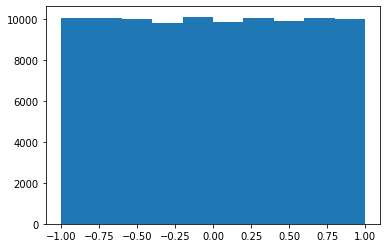

In [64]:
plt.hist(tf.random.uniform((1,100000), minval=-1, maxval=1))

In [65]:
dir(tf.random)

['Algorithm',
 'Generator',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'all_candidate_sampler',
 'categorical',
 'create_rng_state',
 'experimental',
 'fixed_unigram_candidate_sampler',
 'gamma',
 'get_global_generator',
 'learned_unigram_candidate_sampler',
 'log_uniform_candidate_sampler',
 'normal',
 'poisson',
 'set_global_generator',
 'set_seed',
 'shuffle',
 'stateless_binomial',
 'stateless_categorical',
 'stateless_gamma',
 'stateless_normal',
 'stateless_parameterized_truncated_normal',
 'stateless_poisson',
 'stateless_truncated_normal',
 'stateless_uniform',
 'truncated_normal',
 'uniform',
 'uniform_candidate_sampler']

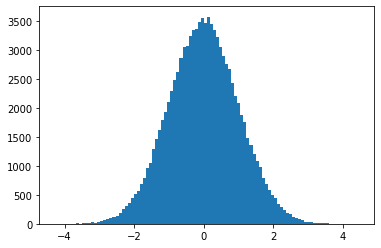

In [76]:
plt.hist(tf.random.normal((1,100000)), bins=100);

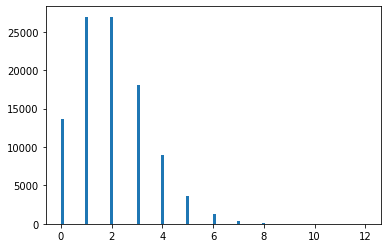

In [94]:
plt.hist(tf.random.poisson((1,100000),2), bins=100);

In [46]:
dp.random_noise()

<tf.Tensor: shape=(64, 100), dtype=float32, numpy=
array([[-0.06645918, -0.21604419,  0.3819065 , ...,  0.36998892,
         0.6969378 , -0.55431104],
       [-0.6044755 , -0.12553668, -0.09016252, ...,  0.52527046,
        -0.6648936 , -0.74709105],
       [-0.34636378,  0.57262707, -0.40946746, ..., -0.41667056,
         0.67258453,  0.1087873 ],
       ...,
       [-0.16656446, -0.38096404,  0.8800223 , ...,  0.6466968 ,
        -0.59501004,  0.21744299],
       [ 0.49608803,  0.89505196, -0.6284995 , ..., -0.13551617,
         0.9418509 , -0.07903862],
       [-0.0926218 ,  0.17371821,  0.56297684, ...,  0.49133992,
        -0.6698551 , -0.8268392 ]], dtype=float32)>

(array([[ 40.,  15.,  19.,   8.,   7.,   4.,   5.,   1.,   1.,   0.],
        [ 17.,  16.,  19.,  15.,  13.,  11.,   6.,   2.,   0.,   1.],
        [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([0.        , 0.25432637, 0.50865275, 0.7629791 , 1.0173055 ,
        1.2716318 , 1.5259582 , 1.7802845 , 2.034611  , 2.2889373 ,
        2.5432637 ], dtype=float32),
 <a list of 3 BarContainer objects>)

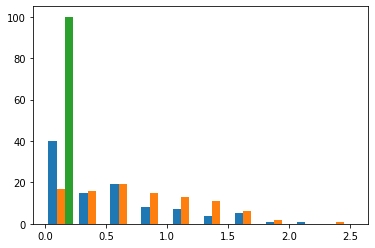

In [41]:
plt.hist(dp.generate_data(100))

In [33]:
dp.g_net.

In [32]:
joblib.dump(dp, 'gan_model.joblib')

2022-02-25 07:30:36.193200: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://3b5c9472-4fce-40e8-8f8f-c65fd931e21f/assets
INFO:tensorflow:Assets written to: ram://7f8bfabd-9ee5-4bde-b575-f0de12d6b2dd/assets


PicklingError: Can't pickle <function make_gradient_clipnorm_fn.<locals>.<lambda> at 0x167ee8280>: it's not found as keras.optimizer_v2.utils.make_gradient_clipnorm_fn.<locals>.<lambda>

In [30]:
dp

In [ ]:
file_path_output = os.path.join(path_output, f'epochs_{nepochs}_{filename}')
gen_data.to_csv(file_path_output, index=False)
plot_user_geodata(gen_data, user=user_conjoint, title=f'generated_epoch_{nepochs}', img_path=path_img)



In [ ]:


def train_gan(
    path_data:str = os.path.join(PATH_LOCAL_DATA, 'users'),
    path_output:str = os.path.join(PATH_LOCAL_DATA, 'users_gan'),
    path_models_out:str = os.path.join(PATH_LOCAL_DATA, 'models_gan'),
    path_img:str = os.path.join(PATH_LOCAL_DATA, 'img'),
    filename:str = 'data_user_100.csv',
    nepochs:int = 2,
    param:dict = {'batch_size': 64,
                'discriminatorDims': [64, 32, 16, 1],
                'generatorDims': [512, 3],
                'input_dim': 3,
                'optimizer': 'Adam',
                'random_dim': 100
                }
):

    for path in [path_data, path_output, path_img, path_models_out]:
        if not os.path.exists(path):
            os.mkdir(path)

    file_path = os.path.join(path_data, filename)

    data = pd.read_csv(file_path)

    # Training
    g_optimizer, d_optimizer = get_optimizers(param["optimizer"])
        
    dp = GAN(
        param["input_dim"],
        param["random_dim"],
        param["discriminatorDims"],
        param["generatorDims"],
        g_optimizer,
        d_optimizer
    )

    data_conjoint, user_conjoint = get_data_user_conjoined(data)
    plot_user_geodata(data, user=user_conjoint, title='original', img_path=path_img)

    data_scaled, scaler = get_scaled_data(data_conjoint)
    dataset = tf.data.Dataset.from_tensor_slices(data_scaled).shuffle(50000).batch(param["batch_size"], drop_remainder=True)

    results = dp.train(dataset, nepochs, param["batch_size"], data.shape[0])
    gen_data = get_generated_data(results, scaler, user=user_conjoint)

    file_path_output = os.path.join(path_output, f'epochs_{nepochs}_{filename}')
    gen_data.to_csv(file_path_output, index=False)
    plot_user_geodata(gen_data, user=user_conjoint, title=f'generated_epoch_{nepochs}', img_path=path_img)


if __name__ == '__main__':
    train_gan()